# Ikä- ja tunneilmiön ennustus kuvista(CNN)

Ladataan valmiit konvoluutioverkkomallit (CNN) ikä- ja tunnetilan ennustamiseen. Testikuvista ennustetaan henkilön ikäluokka sekä tunnetila.


In [16]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.utils import load_img, img_to_array

#### Määritellään luokat

Ikä ja tunnetilat, joita mallit ennustavat.


In [17]:
# Luokat
age_labels = ["0-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+"]
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

#### Mallien lataus

Ladataan ennalta koulutetut CNN-mallit ikä- ja tunnetilan ennustamiseen.


In [18]:
# Lataa mallit
model_age = load_model("age_CNN.keras", compile=False)
model_emotions = load_model("emotions_CNN.keras", compile=False)

#### Testikuvien lataus ja esikäsittely

Ladataan ja skaalataan kuvat oikeaan muotoon ennustamista varten.

`load_img(img_path, target_size=(48, 48))`: Lataa kuvan ja skaalaa sen kokoon 48x48 pikseliä. Malli odottaa syötteenä 48x48 kokoisia kuvia.

`original_imgs.append(img)`: Tallentaa alkuperäisen PIL-kuvan listaan.

`img_to_array(img) / 255.0`: Muuntaa kuvan numeeriseksi taulukoksi (NumPy array) ja normalisoi pikseliarvot välille [0, 1].

`images.append(img_array)`: Tallentaa esikäsitellyn kuvan listaan.


In [52]:
# Hae testikuvat (max 6)
test_images = glob.glob("kuvat/testaus/*.png")

# Esikäsittele kuvat
images = []
original_imgs = []
for img_path in test_images:
    img = load_img(img_path, target_size=(48, 48))
    original_imgs.append(img)
    img_array = img_to_array(img) / 255.0
    images.append(img_array)

images_np = np.array(images)

#### Ennustaminen

Syötetään kuvat molemmille malleille ja saadaan ennusteet.

In [53]:
# Ennusta kaikki kerralla
age_preds = model_age.predict(images_np, verbose=0)
emotion_preds = model_emotions.predict(images_np, verbose=0)

#### Tulosten visualisointi

Näytetään kuvat ja mallien antamat ikä- ja tunnetilaennusteet.


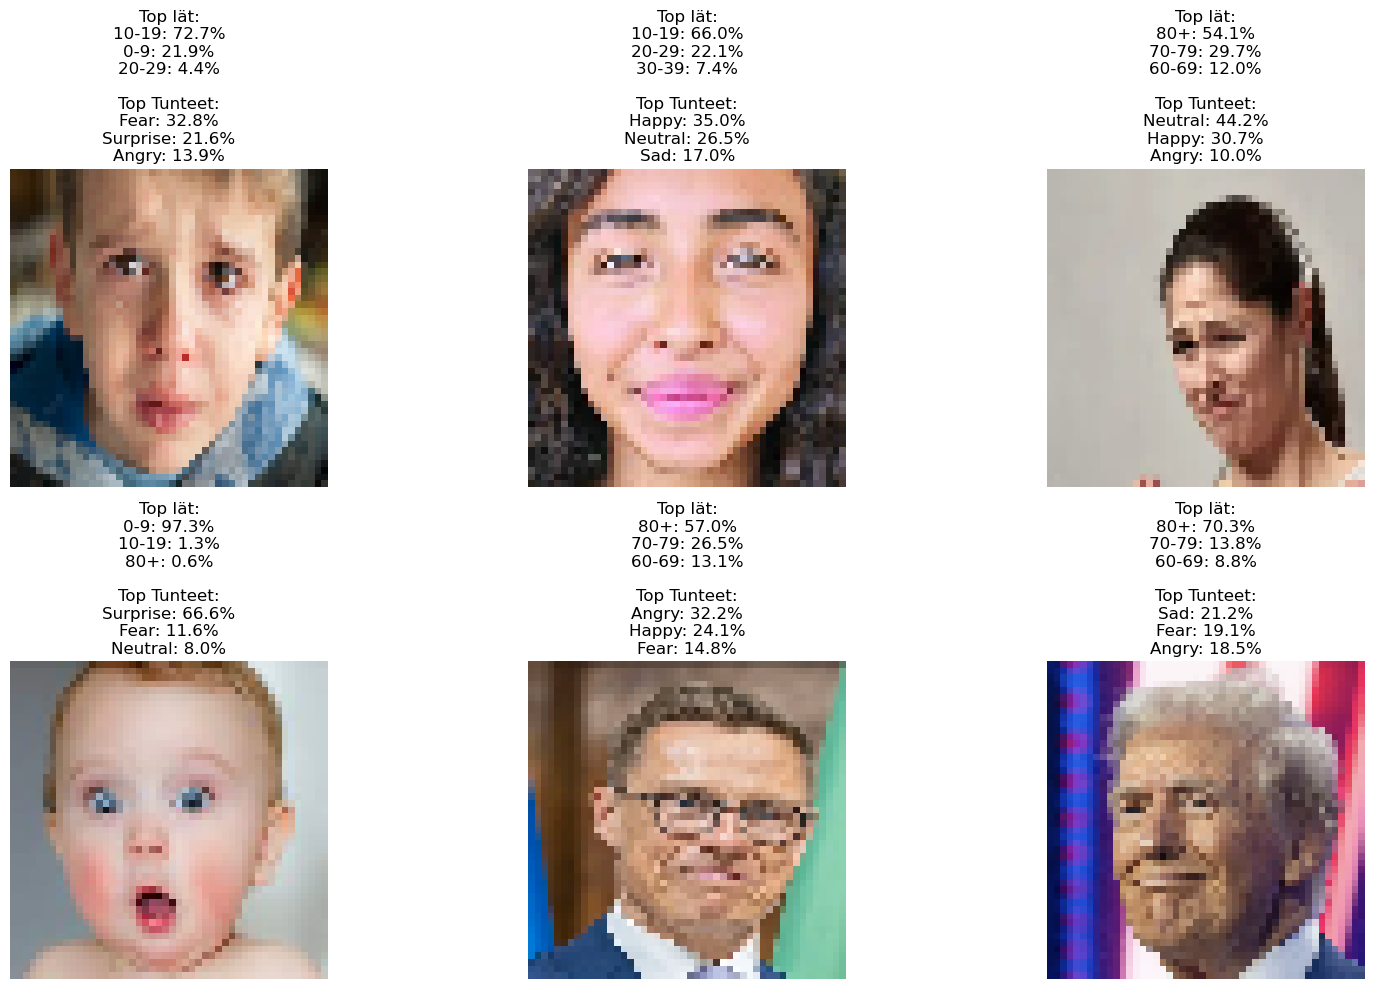

In [55]:
# Näytä kuvat ja ennusteet
plt.figure(figsize=(16, 10))  # Increase figure size
for i in range(len(images_np)):
    # Top 3 ikää
    top_3_age_indices = np.argsort(age_preds[i])[-3:][::-1]
    top_3_ages = [age_labels[idx] for idx in top_3_age_indices]
    top_3_age_probs = [age_preds[i][idx] * 100 for idx in top_3_age_indices]

    # Top 3 tunnetta
    top_3_emotion_indices = np.argsort(emotion_preds[i])[-3:][::-1]
    top_3_emotions = [emotion_labels[idx] for idx in top_3_emotion_indices]
    top_3_emotion_probs = [emotion_preds[i][idx] * 100 for idx in top_3_emotion_indices]


    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(original_imgs[i])
    plt.axis('off')


    age_text = "\n".join([f"{age}: {prob:.1f}%" for age, prob in zip(top_3_ages, top_3_age_probs)])
    emotion_text = "\n".join([f"{emotion}: {prob:.1f}%" for emotion, prob in zip(top_3_emotions, top_3_emotion_probs)])
    plt.title(f"Top Iät:\n{age_text}\n\nTop Tunteet:\n{emotion_text}")

plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.tight_layout()
plt.show()

Mallilla on vaikeuksia ilmeiden tunnistamisessa varsinkin kun ihmiset eivät katso suoraan kameraan. Malli ennustaa ikäluokan melko hyvin, mutta monesti ennustettu ikä on vanhempi kuin todellinen ikä.

Malli onnistuu hyvin nuorimman ikäluokan tunnistamisessa, mutta vanhemmissa ikäluokissa ennusteet ovat epätarkkoja. Malli ei myöskään osaa erotella keski-ikäisiä vanhuksista.